# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.107540e+01     7.365105e+00
 * time: 0.0021550655364990234
     1     2.832922e+01     5.420036e+00
 * time: 0.009031057357788086
     2     1.902921e+01     5.182533e+00
 * time: 0.01669907569885254
     3     1.329596e+01     3.093076e+00
 * time: 0.02395796775817871
     4     1.080072e+01     2.132696e+00
 * time: 0.030076980590820312
     5     9.879542e+00     1.809222e+00
 * time: 0.03628897666931152
     6     9.051179e+00     1.421736e+00
 * time: 0.042201995849609375
     7     8.604693e+00     8.950588e-01
 * time: 0.048182010650634766
     8     8.389001e+00     5.294171e-01
 * time: 0.08923506736755371
     9     8.364583e+00     1.076011e+00
 * time: 0.09366798400878906
    10     8.293513e+00     7.205142e-01
 * time: 0.09738993644714355
    11     8.214306e+00     8.622818e-01
 * time: 0.10106301307678223
    12     8.168761e+00     9.687815e-01
 * time: 0.10471796989440918
    13     8.088904e+00     5.164650e-01
 *

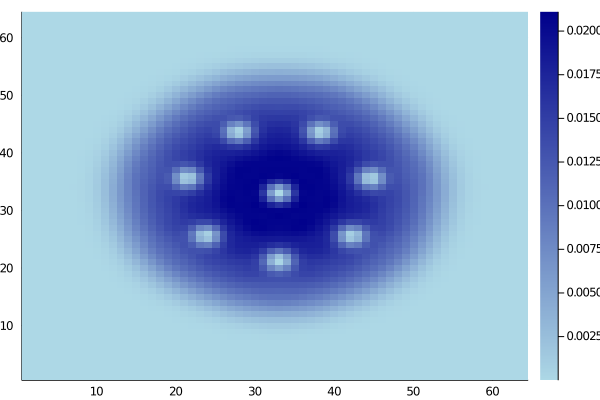

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)